<a href="https://colab.research.google.com/github/heubanufi/Webteam/blob/main/project202084020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **서울시 지하철 출퇴근 시간 승하차 인원 정보**

사용한 데이터
1. 서울시 지하철 호선별 역별 승하차 인원
2. 서울시 지하철 호선별 역별 시간대별 승하차 인원

**- 첫 번째 데이터: 서울시 지하철 호선별 역별 승하차 인원**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('서울시 지하철호선별 역별 승하차 인원 정보.csv', encoding='EUC-KR',
                 dtype={'사용일자':str, '호선명':str, '역명':str, '등록일자':str}, low_memory=False)

In [ ]:
with open('서울시 지하철호선별 역별 승하차 인원 정보.csv', encoding='EUC-KR') as f:
  print(f.readline())
  print(f.readline())

"사용일자","호선명","역명","승차총승객수","하차총승객수","등록일자"

"20230511","우이신설선","4.19민주묘지","4992","4836","20230514"



In [ ]:
df.rename(columns={'역명': '지하철역'},inplace=True)

In [ ]:
import numpy as np

# 데이터프레임을 '호선명과 '지하철역' 열을 기준으로 그룹화
grouped_df = df.groupby(['호선명', '지하철역'])

# 각 그룹에서 '승차총승객수'와 '하차총승객수' 열의 평균을 계산
df_avg_in = grouped_df['승차총승객수'].mean()
df_avg_out = grouped_df['하차총승객수'].mean()

# 각 그룹에서 최대값과 최소값을 계산
df_max = grouped_df['하차총승객수'].max()
df_min = grouped_df['하차총승객수'].min()

# 결과 데이터프레임 생성
result = pd.DataFrame({
    '일 평균 승차 승객 수': df_avg_in,
    '일 평균 하차 승객 수': df_avg_out,
    '일 최대 하차 승객 수': df_max,
    '일 최소 하차 승객 수': df_min
})

# 결과 데이터프레임을 '호선명'과 '역명' 열을 기준으로 정렬
result.sort_index(inplace=True)

result.head(11)


일 평균 승차 승객 수  일 평균 하차 승객 수  일 최대 하차 승객 수  일 최소 하차 승객 수
호선명 지하철역                                                                
1호선 동대문              11818.500     11595.325         13801          8674
    동묘앞              10012.925     10353.600         17110          5570
    서울역              51400.775     48921.775         62865         33892
    시청               24549.950     24664.850         31188         10758
    신설동              13441.300     12983.875         15494          7204
    제기동              16913.100     17251.250         20143         10501
    종각               35352.325     34557.925         44058         12846
    종로3가             26126.275     23750.425         29010         14739
    종로5가             24275.800     23888.000         28323         11875
    청량리(서울시립대입구)     20024.100     19838.400         23098         13043
2호선 강남               74182.650     71819.575         94078         31989

--------------------------------------------------------

**- 두 번째 데이터: 서울시 지하철 호선별 역별 시간대별 승하차 인원**

In [ ]:
import pandas as pd
df2 = pd.read_csv('서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv', encoding='EUC-KR',
                 dtype={'호선명':str, '지하철역':str}, low_memory=False)

In [ ]:
with open('서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv', encoding='EUC-KR') as f:
  print(f.readline())
  print(f.readline())

In [ ]:
df2.head()

In [ ]:
df2_time = df2.loc[:, '호선명':'03시-04시 하차인원']

**출근시간 승하차, 퇴근시간 승하차 인원 데이터 정리**

In [ ]:
df2_time['01시-04시 승차인원'] = df2_time['01시-02시 승차인원'] + df2_time['02시-03시 승차인원'] + df2_time['03시-04시 승차인원']
df2_time = df2_time.drop(['01시-02시 승차인원', '02시-03시 승차인원', '03시-04시 승차인원'], axis=1)
df2_time['01시-04시 하차인원'] = df2_time['01시-02시 하차인원'] + df2_time['02시-03시 하차인원'] + df2_time['03시-04시 하차인원']
df2_time = df2_time.drop(['01시-02시 하차인원', '02시-03시 하차인원', '03시-04시 하차인원'], axis=1)


In [ ]:
#아침(출근시간) 승차
df2_time['04시-10시 승차인원'] = df2_time[['01시-04시 승차인원', '04시-05시 승차인원', '05시-06시 승차인원', '06시-07시 승차인원',
                              '07시-08시 승차인원', '08시-09시 승차인원', '09시-10시 승차인원']].sum(axis=1)
df2_time = df2_time.drop(['01시-04시 승차인원', '04시-05시 승차인원', '05시-06시 승차인원', '06시-07시 승차인원', '07시-08시 승차인원',
                '08시-09시 승차인원', '09시-10시 승차인원'], axis=1)
#아침(출근시간) 하차
df2_time['04시-10시 하차인원'] = df2_time[['01시-04시 하차인원', '04시-05시 하차인원', '05시-06시 하차인원', '06시-07시 하차인원',
                              '07시-08시 하차인원', '08시-09시 하차인원', '09시-10시 하차인원']].sum(axis=1)
df2_time = df2_time.drop(['01시-04시 하차인원', '04시-05시 하차인원', '05시-06시 하차인원', '06시-07시 하차인원', '07시-08시 하차인원',
                '08시-09시 하차인원', '09시-10시 하차인원'], axis=1)

In [ ]:
#저녁(퇴근시간) 승차
df2_time['17시-25시 승차인원'] = df2_time['17시-18시 승차인원'] + df2_time['18시-19시 승차인원'] + df2_time['19시-20시 승차인원'] + df2_time['20시-21시 승차인원']
+ df2_time['21시-22시 승차인원'] + df2_time['22시-23시 승차인원'] + df2_time['23시-24시 승차인원'] + df2_time['00시-01시 승차인원']
df2_time = df2_time.drop(['17시-18시 승차인원', '18시-19시 승차인원', '19시-20시 승차인원', '20시-21시 승차인원', '21시-22시 승차인원',
                '22시-23시 승차인원', '23시-24시 승차인원', '00시-01시 승차인원'], axis=1)

#저녁(퇴근시간) 하차
df2_time['17시-25시 하차인원'] = df2_time['17시-18시 하차인원'] + df2_time['18시-19시 하차인원'] + df2_time['19시-20시 하차인원'] + df2_time['20시-21시 하차인원']
+ df2_time['21시-22시 하차인원'] + df2_time['22시-23시 하차인원'] + df2_time['23시-24시 하차인원'] + df2_time['00시-01시 하차인원']
df2_time = df2_time.drop(['17시-18시 하차인원', '18시-19시 하차인원', '19시-20시 하차인원', '20시-21시 하차인원', '21시-22시 하차인원',
                '22시-23시 하차인원', '23시-24시 하차인원', '00시-01시 하차인원'], axis=1)

df2_time.head()

**데이터 계산**

In [ ]:
import numpy as np

# 데이터프레임을 '호선명과 '지하철역' 열을 기준으로 그룹화
grouped_df2 = df2_time.groupby(['호선명', '지하철역'])

# 각 그룹에서 '승차총승객수'와 '하차총승객수' 열의 평균을 계산
df2_avg_in_mor = grouped_df2['04시-10시 승차인원'].mean()
df2_avg_out_mor = grouped_df2['04시-10시 하차인원'].mean()
df2_avg_in_nig = grouped_df2['17시-25시 승차인원'].mean()
df2_avg_out_nig = grouped_df2['17시-25시 하차인원'].mean()

# 각 그룹에서 '승차인원'와 '하차인원' 열의 최대값 최소값 계산
df2_max_in_mor = grouped_df2['04시-10시 승차인원'].max()
df2_max_out_mor = grouped_df2['04시-10시 하차인원'].max()
df2_max_in_nig = grouped_df2['17시-25시 승차인원'].max()
df2_max_out_nig = grouped_df2['17시-25시 하차인원'].max()

df2_min_in_mor = grouped_df2['04시-10시 승차인원'].min()
df2_min_out_mor = grouped_df2['04시-10시 하차인원'].min()
df2_min_in_nig = grouped_df2['17시-25시 승차인원'].min()
df2_min_out_nig = grouped_df2['17시-25시 하차인원'].min()


# 결과 데이터프레임 생성
result2 = pd.DataFrame({
    '출근시간(04시-10시) 평균 승차 승객 수': round(df2_avg_in_mor,2),
    '출근시간(04시-10시) 평균 하차 승객 수': round(df2_avg_out_mor,2),
    '퇴근시간(17시-25시) 평균 승차 승객 수': round(df2_avg_in_nig,2),
    '퇴근시간(17시-25시) 평균 하차 승객 수': round(df2_avg_out_nig,2)
})

# 결과 데이터프레임을 '호선명'과 '지하철역' 열을 기준으로 정렬
result2.sort_index(inplace=True)

result2.head(11)


**데이터 프레임에서 추출한 값을 '호선명'과 '지하철역'을 merge**

In [ ]:
seoul_sub = pd.merge(result, result2, on=['호선명', '지하철역'])
seoul_sub.head(30)

(1) 출근시간 평균 승차 승객 수를 기준으로 내림차순 정렬

In [ ]:
seoul_sub_sorted1 = seoul_sub.sort_values(by='출근시간(04시-10시) 평균 승차 승객 수', ascending=False)
seoulSubwayTop1 = seoul_sub_sorted1.groupby('호선명').head()

seoulSubwayTop1.head(20)

(2) 출근시간 평균 하차 승객 수를 기준으로 내림차순 정렬

In [ ]:
seoul_sub_sorted2 = seoul_sub.sort_values(by='출근시간(04시-10시) 평균 하차 승객 수', ascending=False)
seoulSubwayTop2 = seoul_sub_sorted2.groupby('호선명').head()

seoulSubwayTop2.head(20)

(3) 퇴근시간 평균 하차 승객 수를 기준으로 내림차순 정렬

In [ ]:
seoul_sub_sorted3 = seoul_sub.sort_values(by='퇴근시간(17시-25시) 평균 승차 승객 수', ascending=False)
seoulSubwayTop3 = seoul_sub_sorted3.groupby('호선명').head()

seoulSubwayTop3.head(20)

(4) 퇴근시간 평균 하차 승객 수를 기준으로 내림차순 정렬

In [ ]:
seoul_sub_sorted4 = seoul_sub.sort_values(by='퇴근시간(17시-25시) 평균 하차 승객 수', ascending=False)
seoulSubwayTop4 = seoul_sub_sorted3.groupby('호선명').head()

seoulSubwayTop4.head(20)

**일 평균 승차 승객 수가 높은 수부터 내림차순 정렬**

In [ ]:
seoul_sub_sorted = seoul_sub.sort_values(by='일 평균 승차 승객 수', ascending=False)
seoulSubwayTop = seoul_sub_sorted.groupby('호선명').head()

seoulSubwayTop.head(50)

** 1차 과제 때 index를 false로 저장하여 호선명과 지하철역이 누락된 것을 true로 바꾸어 다시 저장하여 줍니다.**

In [ ]:
seoulSubwayTop.to_csv('seoulSubwayTop.csv', index=True)
SST = pd.read_csv('seoulSubwayTop.csv')
print(SST)

**시각화를 위해 데이터 수를 상위 50개에서 20개로 줄이기**

In [ ]:
top_20 = seoulSubwayTop.head(20)
top_20.to_csv('seoul_subway_top_20.csv', index=True)

In [ ]:
df3 = pd.read_csv('seoul_subway_top_20.csv')
print(df3)

# **막대 그래프를 이용한 시각화**

폰트 설치

In [ ]:
!pip install -q matplotlib
!sudo apt-get install -y fonts-nanum

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔 폰트 설치 경로 설정
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

# 나눔 폰트 등록
font = fm.FontProperties(fname=fontpath, size=12)
plt.rc('font', family='NanumBarunGothic')


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=100
plt.rcParams['font.family'] = 'NanumBarunGothic'

In [ ]:
print(df3.columns)

**서울 지하철 일평균 승하차 Top20**

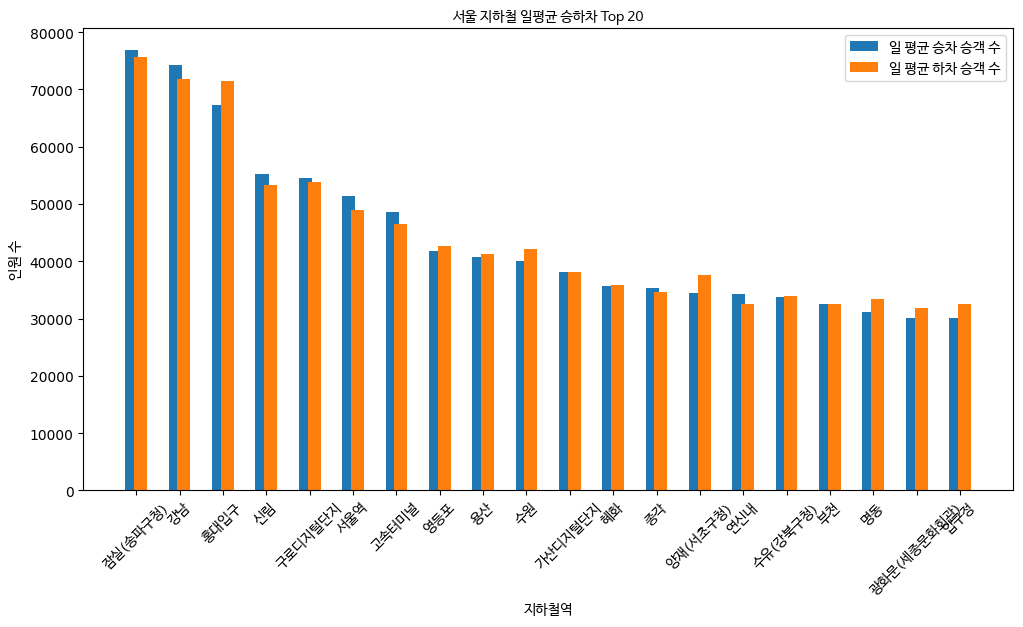

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# 나눔 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

# 나눔 폰트 로드
font_prop = fm.FontProperties(fname=font_path)

# 막대의 위치 계산
bar_width = 0.3
x = df3['지하철역'].tolist()
x_pos = np.arange(len(x))

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(x_pos - 0.1, df3['일 평균 승차 승객 수'], label='일 평균 승차 승객 수', width=bar_width)
plt.bar(x_pos + 0.1, df3['일 평균 하차 승객 수'], label='일 평균 하차 승객 수', width=bar_width)

plt.xlabel('지하철역', fontproperties=font_prop)  # x축 한글 폰트 적용
plt.ylabel('인원 수', fontproperties=font_prop)  # y축 한글 폰트 적용
plt.title('서울 지하철 일평균 승하차 Top 20', fontproperties=font_prop)  # 제목 한글 폰트 적용
plt.legend(prop=font_prop)
plt.xticks(x_pos, x, rotation=45, fontproperties=font_prop)  # x축 라벨 회전 및 한글 폰트 적용
plt.show()


일평균 승차 승객 수 1위 잠실 2위 강남 3위 홍대
일평균 하차 승객 수 1위 잠실 2위 홍대입구 3위 강남

모두 1위인 잠실은 승차인원이 더 많고, 강남은 승차, 홍대입구는 하차 인원이 더 많은 것을 확인할 수 있다.

**서울 지하철 출근시간 승하차**

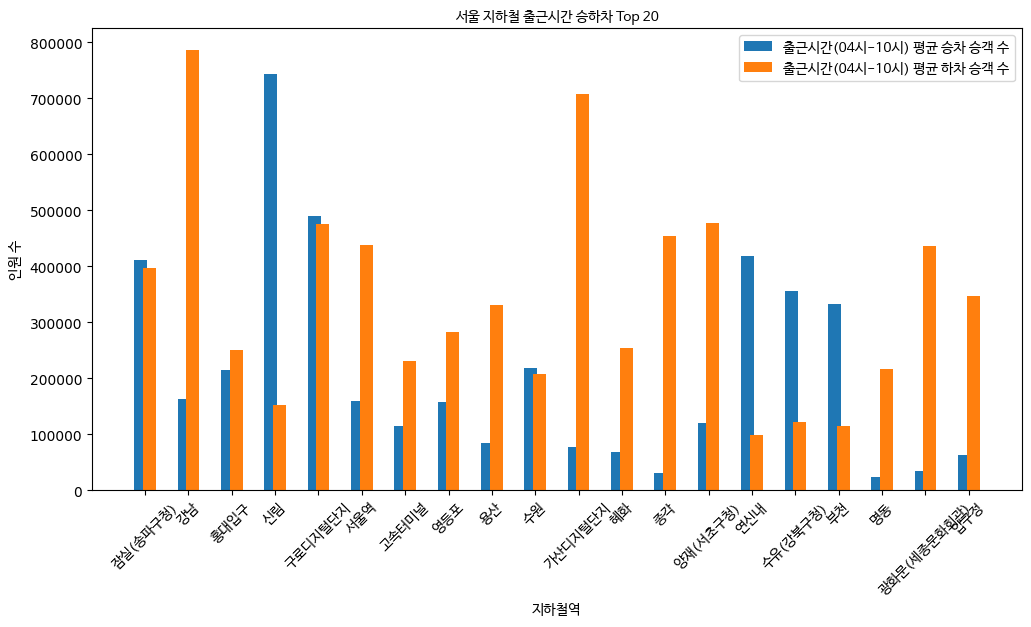

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# 나눔 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

# 나눔 폰트 로드
font_prop = fm.FontProperties(fname=font_path)

# 막대의 위치 계산
bar_width = 0.3
x = df3['지하철역'].tolist()
x_pos = np.arange(len(x))

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(x_pos - 0.1, df3['출근시간(04시-10시) 평균 승차 승객 수'], label='출근시간(04시-10시) 평균 승차 승객 수', width=bar_width)
plt.bar(x_pos + 0.1, df3['출근시간(04시-10시) 평균 하차 승객 수'], label='출근시간(04시-10시) 평균 하차 승객 수', width=bar_width)

plt.xlabel('지하철역', fontproperties=font_prop)  # x축 한글 폰트 적용
plt.ylabel('인원 수', fontproperties=font_prop)  # y축 한글 폰트 적용
plt.title('서울 지하철 출근시간 승하차 Top 20', fontproperties=font_prop)  # 제목 한글 폰트 적용
plt.legend(prop=font_prop)
plt.xticks(x_pos, x, rotation=45, fontproperties=font_prop)  # x축 라벨 회전 및 한글 폰트 적용
plt.show()


출근시간 승차 승객 수 1위 신림, 2위 구로디지털단지, 3위 연신내 그리고 잠실 수유 부천

출근시간 하차 승객 수 1위 강남, 2위 가산디지털단지, 3위 양재 그리고 구로디지털단지 등

**서울 지하철 퇴근시간 승하차**

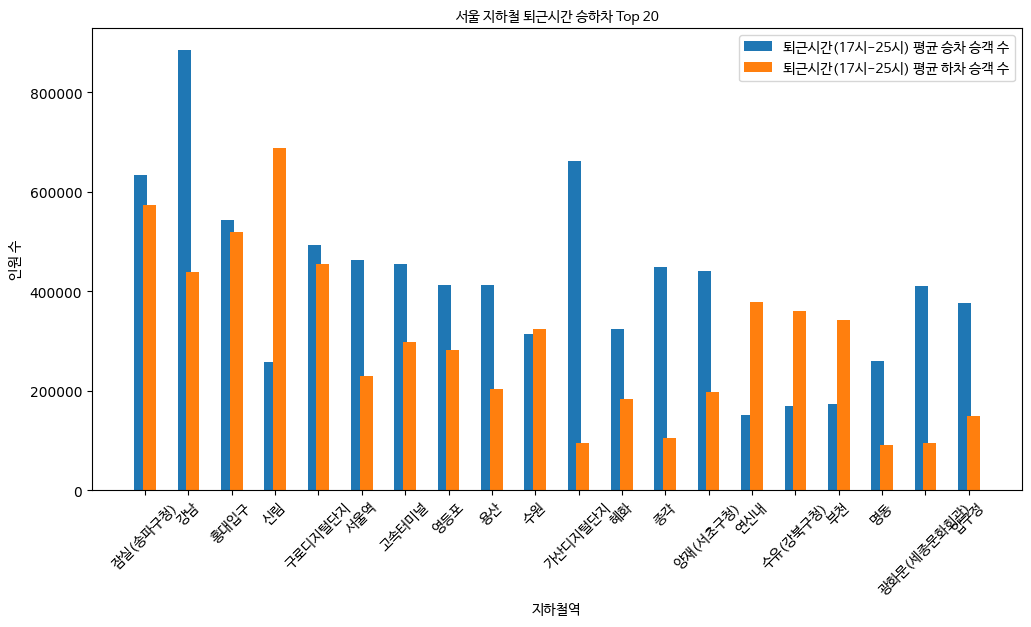

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# 나눔 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

# 나눔 폰트 로드
font_prop = fm.FontProperties(fname=font_path)

# 막대의 위치 계산
bar_width = 0.3
x = df3['지하철역'].tolist()
x_pos = np.arange(len(x))

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(x_pos - 0.1, df3['퇴근시간(17시-25시) 평균 승차 승객 수'], label='퇴근시간(17시-25시) 평균 승차 승객 수', width=bar_width)
plt.bar(x_pos + 0.1, df3['퇴근시간(17시-25시) 평균 하차 승객 수'], label='퇴근시간(17시-25시) 평균 하차 승객 수', width=bar_width)

plt.xlabel('지하철역', fontproperties=font_prop)  # x축 한글 폰트 적용
plt.ylabel('인원 수', fontproperties=font_prop)  # y축 한글 폰트 적용
plt.title('서울 지하철 퇴근시간 승하차 Top 20', fontproperties=font_prop)  # 제목 한글 폰트 적용
plt.legend(prop=font_prop)
plt.xticks(x_pos, x, rotation=45, fontproperties=font_prop)  # x축 라벨 회전 및 한글 폰트 적용
plt.show()


퇴근시간 승차 승객 수 1위 강남, 2위 가산디지털단지, 3위 잠실 그리고 홍대입구이고 신림과 연신내 수유 부천이 출근시간과 다르게 낮은 그래프를 보이고 있다.

출근시간 하차 승객 수 1위 신림, 2위 잠실, 3위 홍대입구 그리고 구로디지털단지 등이 있고 퇴근시간 승차 승객 수 상위를 차지했던 가산디지털단지를 포함하여 명동 광화문 압구정 종각은 매우 낮은 그래프 높이를 보이고 있다.

**서울 출퇴근시간 승차**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# 나눔 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

# 나눔 폰트 로드
font_prop = fm.FontProperties(fname=font_path)

# 막대의 위치 계산
bar_width = 0.3
x = df3['지하철역'].tolist()
x_pos = np.arange(len(x))

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(x_pos - 0.1, df3['출근시간(04시-10시) 평균 승차 승객 수'], label='출근시간(04시-10시) 평균 승차 승객 수', width=bar_width)
plt.bar(x_pos + 0.1, df3['퇴근시간(17시-25시) 평균 승차 승객 수'], label='퇴근시간(17시-25시) 평균 승차 승객 수', width=bar_width)

plt.xlabel('지하철역', fontproperties=font_prop)  # x축 한글 폰트 적용
plt.ylabel('인원 수', fontproperties=font_prop)  # y축 한글 폰트 적용
plt.title('서울 지하철 출근,퇴근시간 승차 Top 20', fontproperties=font_prop)  # 제목 한글 폰트 적용
plt.legend(prop=font_prop)
plt.xticks(x_pos, x, rotation=45, fontproperties=font_prop)  # x축 라벨 회전 및 한글 폰트 적용
plt.show()


**서울 지하철 출퇴근 하차 승객 수**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# 나눔 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

# 나눔 폰트 로드
font_prop = fm.FontProperties(fname=font_path)

# 막대의 위치 계산
bar_width = 0.3
x = df3['지하철역'].tolist()
x_pos = np.arange(len(x))

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(x_pos - 0.1, df3['출근시간(04시-10시) 평균 하차 승객 수'], label='출근시간(04시-10시) 평균 하차 승객 수', width=bar_width)
plt.bar(x_pos + 0.1, df3['퇴근시간(17시-25시) 평균 하차 승객 수'], label='퇴근시간(17시-25시) 평균 하차 승객 수', width=bar_width)

plt.xlabel('지하철역', fontproperties=font_prop)  # x축 한글 폰트 적용
plt.ylabel('인원 수', fontproperties=font_prop)  # y축 한글 폰트 적용
plt.title('서울 지하철 출근,퇴근시간 하차 Top 20', fontproperties=font_prop)  # 제목 한글 폰트 적용
plt.legend(prop=font_prop)
plt.xticks(x_pos, x, rotation=45, fontproperties=font_prop)  # x축 라벨 회전 및 한글 폰트 적용
plt.show()


# **시사점**

**분석 결과**

일평균 승차 승객 수 1위 잠실 2위 강남 3위 홍대
일평균 하차 승객 수 1위 잠실 2위 홍대입구 3위 강남

- 모두 1위인 잠실은 승차인원이 더 많고, 강남은 승차, 홍대입구는 하차 인원이 더 많은 것을 확인할 수 있다.

**출근시간 승차 승객 수** 1위 신림, 2위 구로디지털단지, 3위 연신내 그리고 잠실 수유 부천이며, **출근시간 하차 승객 수** 1위 강남, 2위 가산디지털단지, 3위 양재 그리고 구로디지털단지 등이 있다.
.
1. 일평균 승차 승객 수를 기준으로 20개를 선정했을 때 상위권에 위치한 3개의 역은 2호선이라는 공통점을 가지고 있다.

2. 강남, 서울역, 가산디지털단지, 광화문, 압구정은 출근시간 하차 승객 수가 많고 퇴근시간 하차 승객 수가 많다. 해당 지하철역에서 가까운 곳에 근무지가 있을 것으로 보인다.

3. 잠실, 홍대입구, 구로디지털단지, 수원은 승차 하차의 폭이 좁다. 해당 역들은 경기도이거나 서울과 경기도를 운행하는 버스가 통행한다. 따라서 이는 많은 인원이 버스 환승을 하기 때문에 생긴 그래프로 보인다.

4. 신림, 연신내, 수유, 부천은 출근시간 승차 승객 수가 많고 퇴근시간 하차 승객 수가 많다. 해당 지하철역 근처는 주거단지가 밀집해 있을 것으로 추정된다.

결론적으로 막대그래프 시각화를 통해 서울시 지하철의 승하차 인원 분포와 특성을 파악할 수 있다.

# **한계점**


1. 일 평균 승차 승객 수 상위 20개를 선정하여 그래프를 만들어 비교하였기 때문에 실직적으로 출근시간 승차 승객 수를 기준으로 하였을 때 다른 순위를 만들 수 있다. 까치산, 쌍문, 화곡역이 다음과 같은 경우에 해당된다.
또한 출근시간 하차 승객 수 등 다른 기준으로 정렬했을 때 다른 결과가 발생한다.

2. 버스 정류장에서 환승하는 경우에 대해서 알기 어렵다는 한계가 있다.

3. 출근과 퇴근으로 한정지어 분석하였기 때문에 대학교를 통학하는 학생들을 고려하지 않았다는 한계가 있다.

4. 모든 사람이 아침에 출근하고 저녁에 퇴근하는 것은 아니기 때문에 시간에 대한 한계가 존재한다.

5. 막대그래프를 확인했을 때 20개 역의 정확한 순위를 알기 어렵다.